In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
#Loading the Dataset from Google library
data = pd.read_csv("C:\Python_Files\Churn Modeling.csv")

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Showing the number of columns and rows
data.shape

(10000, 14)

In [8]:
#Showing all of the columns
data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [9]:
#Check for missing data or na values
data.isna().sum()
#Everything is 0, hence, it shows the data has no missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#To show some statistics
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
#To get a count of the categorical column named 'Exited'
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\support\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

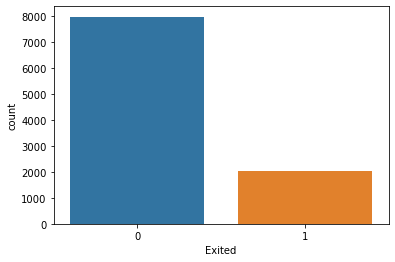

In [12]:
#Visualizing the count of customer exited
sns.countplot(data['Exited'])

In [14]:
#What is the percentage of customers that are leaving
no_retained = data[data.Exited == 0].shape[0]
no_churned = data[data.Exited == 1].shape[0]

#Print the Percentage of the Customers that stayed
print(no_retained/ (no_retained + no_churned) *100, '% of customers stayed with the bank')

#Print the Percentage of the Customers that left
print(no_churned/ (no_retained + no_churned) *100, '% of customers left with the bank')

79.63 % of customers stayed with the bank
20.369999999999997 % of customers left with the bank


<AxesSubplot:xlabel='Gender', ylabel='count'>

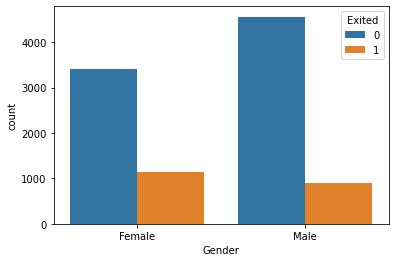

In [19]:
#Visualizing the churn count by Age - best is to use a categorical column
sns.countplot(x='Gender', hue='Exited', data = data)

array([<AxesSubplot:title={'center':'Tenure'}>,
       <AxesSubplot:title={'center':'CreditScore'}>], dtype=object)

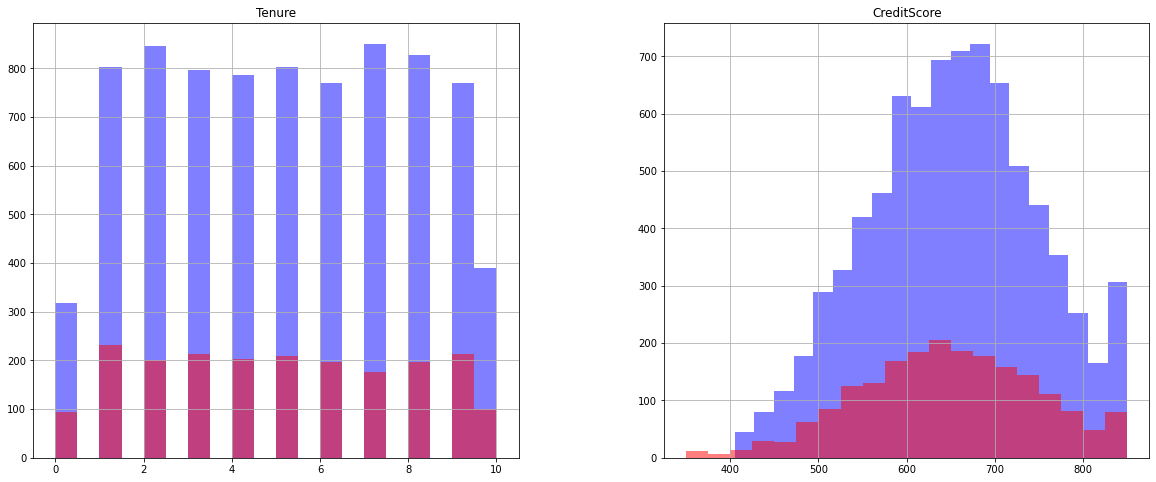

In [18]:
#to check churn with respect to columns (chosen by us)
numerical_features = ['Tenure', 'CreditScore']
fig, ax =plt.subplots(1, 2, figsize=(20,8))
data[data.Exited == 0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax =ax)
data[data.Exited == 1][numerical_features].hist(bins=20, color='red', alpha=0.5, ax =ax)

In [22]:
#Remove unnecessary columns - shown how to remove multiple columns
clean_data = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis = 1)

In [23]:
#Look at the number of rows and cols in the data set
clean_data.shape

(10000, 10)

In [24]:
clean_data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [26]:
#Converting all of the non-numeric columns to numeric
for column in clean_data.columns:
    if clean_data[column].dtype == np.number:
        continue
    clean_data[column] = LabelEncoder().fit_transform(clean_data[column])

C:\Users\support\AppData\Local\Temp/ipykernel_9636/3855324754.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if clean_data[column].dtype == np.number:


In [27]:
#Show the new data set data types
clean_data.dtypes

CreditScore          int64
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [28]:
clean_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,24,2,0.00,0,1,1,101348.88,1
1,217,0,23,1,83807.86,0,0,1,112542.58,0
2,111,0,24,8,159660.80,2,1,0,113931.57,1
3,308,0,21,1,0.00,1,0,0,93826.63,0
4,459,0,25,2,125510.82,0,1,1,79084.10,0


In [30]:
#Scled the data
X = clean_data.drop('Exited', axis=1) #Feature data set
y = clean_data['Exited']

X = StandardScaler().fit_transform(X)

In [31]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state = 42)

In [33]:
#Create the model - and we call out the instance of the class LogisticRegression
model = LogisticRegression()
#Train the model
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
#Create the predictions on the test data
predictions = model.predict(x_test)

#print the predictions
print(predictions)

[0 0 0 ... 0 0 0]


In [35]:
#Check the precision, recall, and f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.17      0.27       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000

